1. Summing the Values in an Array

In [ ]:
import numpy as np
rng = np.random.default_rng() # Seed the random number generator for reproducibility

In [ ]:
L = rng.random(100) # Generate 100 random numbers
sum(L) # Output the sum of the random numbers
# each number is uniformly distributed between 0 and 1, so the expected sum for 100 numbers is around 50.

np.float64(46.40803781975379)

In [3]:
np.sum(L) # Use numpy's sum function to compute the sum of the array
# This is equivalent to the previous sum, but uses numpy's optimized function for potentially better performance.

np.float64(46.408037819753815)

In [4]:
big_array = rng.random(1000000) # Generate a larger array with 1,000,000 random numbers
%timeit sum(big_array) # Measure the time taken to compute the sum using the built-in sum function
%timeit np.sum(big_array) # Measure the time taken to compute the sum using numpy's optimized function

75.2 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
572 μs ± 40 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Be careful, though: the sum function and the np.sum function are not identical, which
can sometimes lead to confusion! In particular, their optional arguments have differ‐
ent meanings (sum(x, 1) initializes the sum at 1, while np.sum(x, 1) sums along
axis 1), and np.sum is aware of multiple array dimensions

2. Maximum and Minimum

In [8]:
min(big_array), max(big_array) # Find the minimum and maximum value in the large array using python's built-in min and max functions

(np.float64(1.5134143506179143e-06), np.float64(0.9999977014095681))

In [9]:
np.min(big_array), np.max(big_array) # Use numpy's functions to find the minimum and maximum values
# The numpy functions are generally faster and more efficient for large arrays.

(np.float64(1.5134143506179143e-06), np.float64(0.9999977014095681))

In [10]:
%timeit min(big_array) # Measure the time taken to find the minimum value using the built-in function
%timeit np.min(big_array) # Measure the time taken to find the minimum value using numpy's function

57.2 ms ± 972 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
312 μs ± 21.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
# For min, max, sum, and several other NumPy aggregates, a shorter syntax is to use
# methods of the array object itself:

In [12]:
print(big_array.min(), big_array.max(), big_array.sum()) # Use methods of the numpy array object to find min, max, and sum
# This is often more readable and can be more efficient than using the standalone functions.

1.5134143506179143e-06 0.9999977014095681 500160.9033093645


3. Multidimensional Aggregates

In [13]:
M = rng.integers(0, 10, (3, 4)) # Generate a 3x4 array of random integers between 0 and 10
print(M) # Print the generated array

[[6 0 5 6]
 [4 1 1 0]
 [6 5 2 6]]


In [14]:
M.sum() # Compute the sum of all elements in the array M
# Numpy aggregations will apply across all elements of a multidimentional array

np.int64(42)

In [21]:
M.min(axis = 0)  # Find the minimum value along the first axis (columns) of the array M
# The function returns four values, corresponding to the minimum of each column.

array([4, 0, 1, 0])

In [22]:

M.max(axis = 1) # Find the maximum value along the second axis (rows) of the array M
# 

array([6, 4, 6])

4. Other Aggregation Functions

In [23]:
'''

Table 7-1. Aggregation functions available in NumPy
Function name   NaN-safe version    Description
np.sum              np.nansum       Compute sum of elements
np.prod             np.nanprod      Compute product of elements
np.mean             np.nanmean      Compute mean of elements
np.std              np.nanstd       Compute standard deviation
np.var              np.nanvar       Compute variance
np.min              np.nanmin       Find minimum value
np.max              np.nanmax       Find maximum value
np.argmin           np.nanargmin    Find index of minimum value
np.argmax           np.nanargmax    Find index of maximum value
np.median           np.nanmedian    Compute median of elements
np.percentile       np.nanpercentile Compute rank-based statistics of elements
np.any              N/A             Evaluate whether any elements are true
np.all              N/A             Evaluate whether all elements are true

'''

'\n\nTable 7-1. Aggregation functions available in NumPy\nFunction name   NaN-safe version    Description\nnp.sum              np.nansum       Compute sum of elements\nnp.prod             np.nanprod      Compute product of elements\nnp.mean             np.nanmean      Compute mean of elements\nnp.std              np.nanstd       Compute standard deviation\nnp.var              np.nanvar       Compute variance\nnp.min              np.nanmin       Find minimum value\nnp.max              np.nanmax       Find maximum value\nnp.argmin           np.nanargmin    Find index of minimum value\nnp.argmax           np.nanargmax    Find index of maximum value\nnp.median           np.nanmedian    Compute median of elements\nnp.percentile       np.nanpercentile Compute rank-based statistics of elements\nnp.any              N/A             Evaluate whether any elements are true\nnp.all              N/A             Evaluate whether all elements are true\n\n'

In [29]:
import pandas as pd
data = pd.read_csv('Data/president_heights.csv')

In [30]:
print(data)

    order                    name  height(cm)
0       1       George Washington         189
1       2              John Adams         170
2       3        Thomas Jefferson         189
3       4           James Madison         163
4       5            James Monroe         183
5       6       John Quincy Adams         171
6       7          Andrew Jackson         185
7       8        Martin Van Buren         168
8       9  William Henry Harrison         173
9      10              John Tyler         183
10     11           James K. Polk         173
11     12          Zachary Taylor         173
12     13        Millard Fillmore         175
13     14         Franklin Pierce         178
14     15          James Buchanan         183
15     16         Abraham Lincoln         193
16     17          Andrew Johnson         178
17     18        Ulysses S. Grant         173
18     19     Rutherford B. Hayes         174
19     20       James A. Garfield         183
20     21       Chester A. Arthur 

In [31]:
heights = np.array(data['height(cm)']) # Convert the heights column to a NumPy array

In [32]:
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [33]:
print("Mean height:", heights.mean()) # Compute the mean height using NumPy's mean function
print("Standard deviation of heights:", heights.std()) # Compute the standard deviation of heights using NumPy's std function
print("Minimum height:", heights.min()) # Find the minimum height using NumPy's min function
print("Maximum height:", heights.max()) # Find the maximum height using NumPy's max function

Mean height: 180.04545454545453
Standard deviation of heights: 6.983599441335736
Minimum height: 163
Maximum height: 193


In [ ]:
print("25th percentile: ", np.percentile(heights, 25)) # This prints the 25th percentile (also called the first quartile, Q1). 25% of the values in the data are less than or equal to this value.
print("Median: ", np.median(heights)) # This prints the median (or 50th percentile, Q2). It's the middle value when the data is sorted.
print("75th percentile: ", np.percentile(heights, 75)) # This prints the 75th percentile (or third quartile, Q3). 75% of the values are less than or equal to this value.

In [42]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

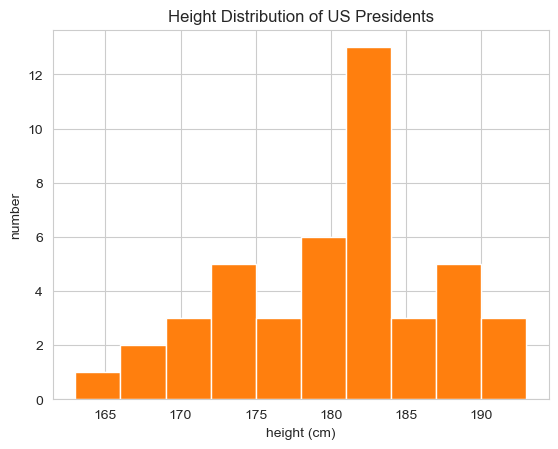

In [44]:
plt.hist(heights) # Create a histogram of the heights
plt.title('Height Distribution of US Presidents') # Set the title of the plot
plt.xlabel('height (cm)') # Set the x-axis label
plt.ylabel('number');
plt.show() # Display the plot